In [97]:
# Histogram equalization

# https://jstar0525.tistory.com/7

# 누적합 구하고 min으로 펴준다.

In [98]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

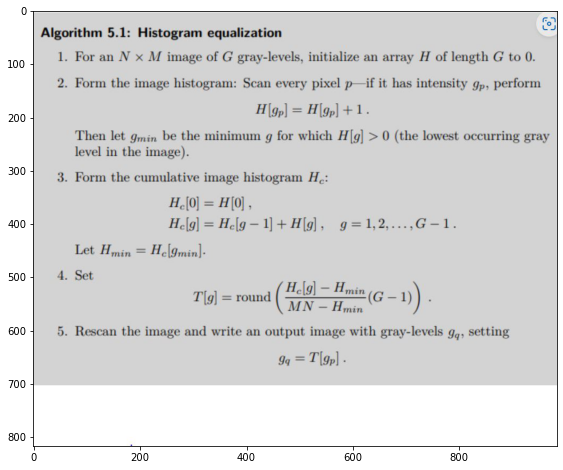

In [99]:
hist_equal = Image.open('./histequal.JPG')
plt.figure(figsize=(10,8))
plt.imshow(hist_equal)
plt.show()

In [100]:
hist_equal1 = cv2.imread('./histequal.JPG')

cv2.imshow('hist_equal1', hist_equal1)
cv2.waitKey(0)
cv2.destroyAllWindows()

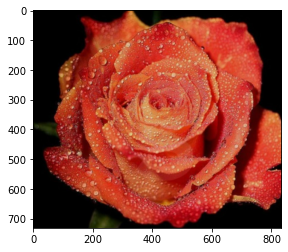

In [101]:
img1 = cv2.imread('./rose.JPG', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()

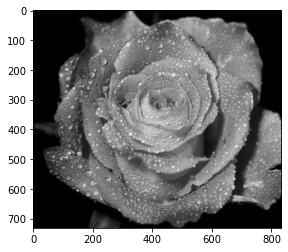

In [102]:
img1 = cv2.imread('./rose.JPG', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img1, cmap='gray')
plt.show()

In [103]:
img1.shape

(731, 834)

In [105]:
def histogram_equalization(img):
    
    (N, M) = img.shape
    G = 256 # gray Levels
    H = np.zeros(G) # initialize an array Histogram
    
    for g in img.ravel():
        H[g] += 1        # 인덱스에 포함
    g_min = np.min(np.nonzero(H))  # nonzero인 것 중 min 값
    
    
    H_c = np.zeros_like(H) # cumulative image histogram (누적합)
    H_c[0] = H[0]
    for g in range(1, G):
        H_c[g] = H_c[g-1] + H[g]
    H_min = H_c[g_min]      # 누적합 갯수
    
    
    T = np.round( (H_c - H_min) / (M*N - H_min) * (G-1) ) # 원하는 값
    
    result = np.zeros_like(img)
    for n in range(N):
        for m in range(M):
            result[n, m] = T[img[n, m]]
    
    return result, T

In [106]:
result, T = histogram_equalization(img1)

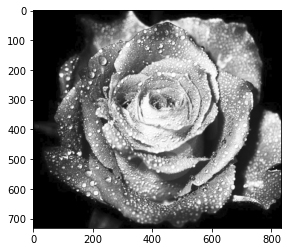

In [112]:
plt.imshow(result, cmap='gray')
plt.show()

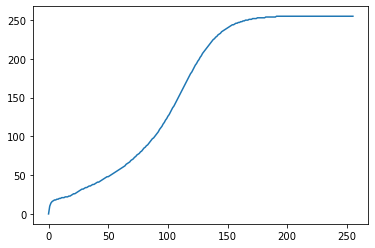

In [108]:
plt.plot(T)
plt.show()

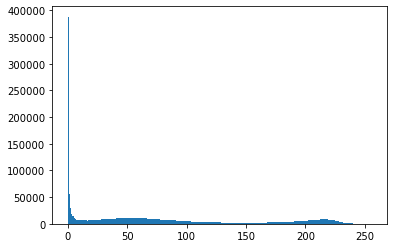

In [109]:
img1 = cv2.imread('./rose.JPG', cv2.IMREAD_COLOR)
plt.hist(img1.ravel(), 256, [0,256]);
plt.show()

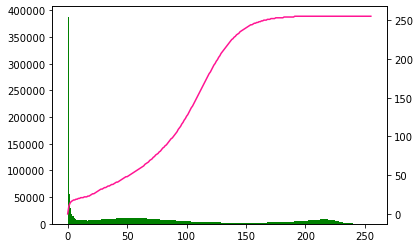

In [110]:
fig, ax1 = plt.subplots()
ax1.hist(img1.ravel(), 256, [0,256], color='green')
ax2 = ax1.twinx()
ax2.plot(T, color='deeppink')

plt.show()

In [1]:
# https://opencv-python.readthedocs.io/en/latest/doc/20.imageHistogramEqualization/imageHistogramEqualization.html

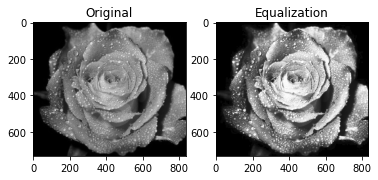

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./rose.JPG')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

hist, bins = np.histogram(img.flatten(), 256, [0,256])

cdf = hist.cumsum()

cdf_m = np.ma.masked_equal(cdf,0)

#History Equalization 공식
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

# Mask처리를 했던 부분을 다시 0으로 변환
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.subplot(122),plt.imshow(img2, cmap='gray'),plt.title('Equalization')
plt.show()

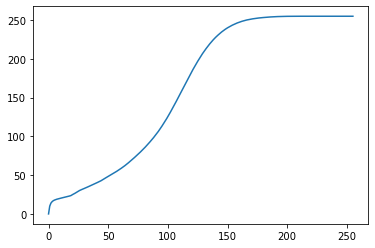

In [15]:
plt.plot(cdf_m)
plt.show()